# Fetch Rewards take-home assessment
## Users Analysis

In [2]:
#Installing libraries
!pip install pandas -qq
!pip install matplotlib -qq

In [3]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

#loading Users table into dataset
df_Users = pd.read_csv ('C:/Users/maggi/Downloads/USER_TAKEHOME.csv')


In [4]:
#Analysing the user dataset
# displays the first 5 rows in our dataset
df_Users.head()

,ID,CREATED_DATE,BIRTH_DATE,STATE,LANGUAGE,GENDER
0,5ef3b4f17053ab141787697d,2020-06-24 20:17:54.000 Z,2000-08-11 00:00:00.000 Z,CA,es-419,female
1,5ff220d383fcfc12622b96bc,2021-01-03 19:53:55.000 Z,2001-09-24 04:00:00.000 Z,PA,en,female
2,6477950aa55bb77a0e27ee10,2023-05-31 18:42:18.000 Z,1994-10-28 00:00:00.000 Z,FL,es-419,female
3,658a306e99b40f103b63ccf8,2023-12-26 01:46:22.000 Z,NaN,NC,en,NaN
4,653cf5d6a225ea102b7ecdc2,2023-10-28 11:51:50.000 Z,1972-03-19 00:00:00.000 Z,PA,en,female


#### We examined the column names and their corresponding values to gain a foundational understanding of the dataset. We observed that both 'created_date' and 'birth_date' were timestamp columns, indicating they stored specific points in time. Furthermore, the 'Language' column appeared to contain alphanumeric values. We also noted the presence of NaN values in our dataset.

In [6]:
# provides basic details 
df_Users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   ID            100000 non-null  object
 1   CREATED_DATE  100000 non-null  object
 2   BIRTH_DATE    96325 non-null   object
 3   STATE         95188 non-null   object
 4   LANGUAGE      69492 non-null   object
 5   GENDER        94108 non-null   object
dtypes: object(6)
memory usage: 4.6+ MB


#### We determined the total number of records and the frequency of values within each column. The 'ID' column has no null values and in the next step will check for duplicates in the dataset. 
#### Initially, Pandas classified all columns as object data types, which need to be reassigned properly.

In [8]:
# to get sum of null values in each column
df_Users.isnull().sum()

ID                  0
CREATED_DATE        0
BIRTH_DATE       3675
STATE            4812
LANGUAGE        30508
GENDER           5892
dtype: int64

#### Just reconfirmed the presence of null values and counted the total null values in each column

In [10]:
# To check duplicates
df_Users.duplicated().sum()

0

#### We found no duplicate entries in the dataset, making the ID column an ideal primary key for loading this dataset as a table.

In [12]:
df_Users.describe()
# To get statistics for each column for better understanding


,ID,CREATED_DATE,BIRTH_DATE,STATE,LANGUAGE,GENDER
count,100000,100000,96325,95188,69492,94108
unique,100000,99942,54721,52,2,11
top,5ef3b4f17053ab141787697d,2023-01-12 18:30:15.000 Z,1970-01-01 00:00:00.000 Z,TX,en,female
freq,1,2,1272,9028,63403,64240


#### we got to know gender has 11 unique values, which need a deeper look 

In [14]:
#Assign data types for each column

df_Users['ID'] = df_Users['ID'].astype(str)
df_Users['CREATED_DATE'] = pd.to_datetime(df_Users['CREATED_DATE'])
df_Users['BIRTH_DATE'] = pd.to_datetime(df_Users['BIRTH_DATE'])
# Since our dataset contains NaN values, converting them to strings would result in 'nan' strings. To maintain null values, we'll replace 'nan' strings with None."
df_Users['STATE'] = df_Users['STATE'].astype('category').replace('nan', None) 
df_Users['LANGUAGE'] = df_Users['LANGUAGE'].astype(str).replace('nan', None)
df_Users['GENDER'] = df_Users['GENDER'].astype(str).replace('nan', None) 

df_Users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype              
---  ------        --------------   -----              
 0   ID            100000 non-null  object             
 1   CREATED_DATE  100000 non-null  datetime64[ns, UTC]
 2   BIRTH_DATE    96325 non-null   datetime64[ns, UTC]
 3   STATE         95188 non-null   category           
 4   LANGUAGE      69492 non-null   object             
 5   GENDER        94108 non-null   object             
dtypes: category(1), datetime64[ns, UTC](2), object(3)
memory usage: 3.9+ MB


#### From the above. We confirmed our assigned data types and null count based on the results.

In [16]:
# checks the number of unique values in each column in the dataset
df_Users.nunique()

ID              100000
CREATED_DATE     99942
BIRTH_DATE       54721
STATE               52
LANGUAGE             2
GENDER              11
dtype: int64

#### The Gender column with 11 unique values needs a deeper look

In [18]:
# To check the unique values in the respective(gender) column
df_Users['GENDER'].unique()

array(['female', None, 'male', 'non_binary', 'transgender',
       'prefer_not_to_say', 'not_listed', 'Non-Binary', 'unknown',
       'not_specified', "My gender isn't listed", 'Prefer not to say'],
      dtype=object)

#### From the above list of values, We observed some duplicate and synonymous values in the list, indicating a need for data cleaning to ensure consistency.

In [20]:
# Define a mapping function to recategorize the gender values
def recategorize_gender(gender):
    if gender in ['male']:
        return 'male'
    elif gender in ['female']:
        return 'female'
    elif gender in ['prefer_not_to_say', 'Prefer not to say']:
        return 'Prefer not to say'
    else:
        return 'Other'

# Create the new column 'gender_updated' with the recategorized values
df_Users['GENDER_Uptd'] = df_Users['GENDER'].apply(recategorize_gender)

# Drop the original 'GENDER' column
df_Users.drop(columns=['GENDER'], inplace=True)

# Rename the new gender_uptd column to gender column
df_Users = df_Users.rename(columns={'GENDER_Uptd': 'GENDER'})

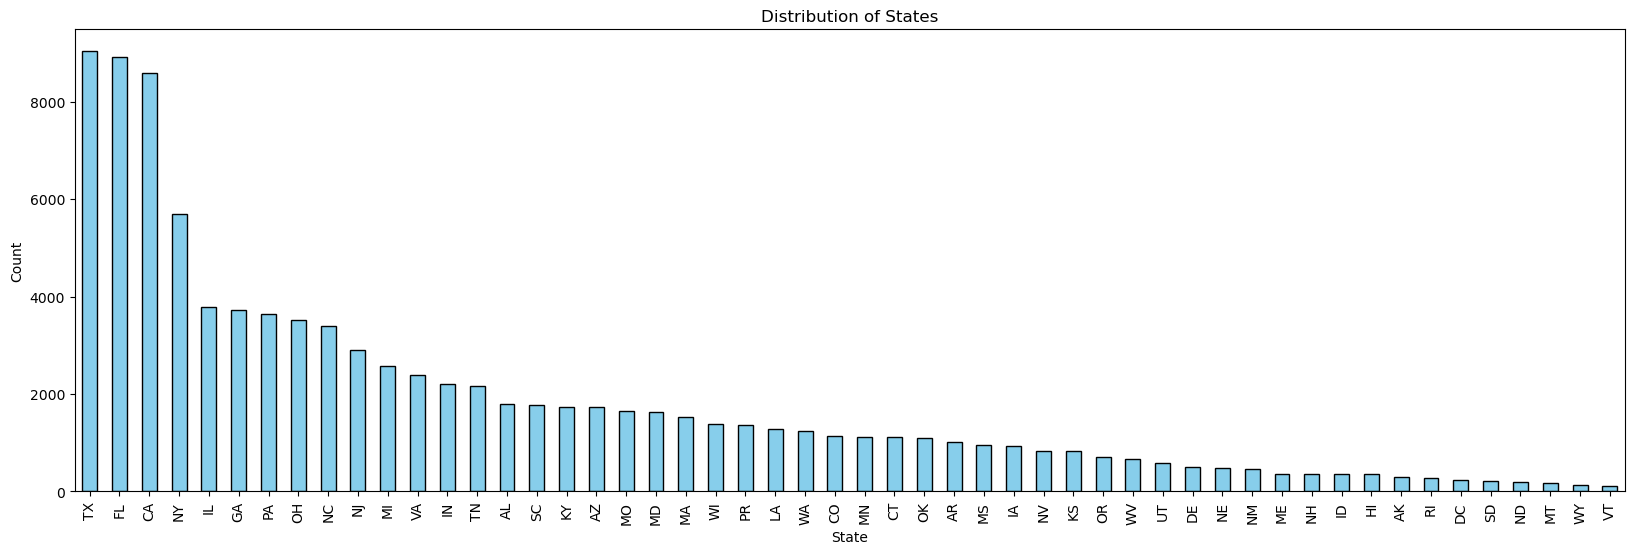

In [21]:
# Analyzing states column values
# Count occurrences of each state
Counts = df_Users['STATE'].value_counts()

# Create bar chart
plt.figure(figsize=(20, 6))
Counts.plot(kind='bar', color= 'skyblue', edgecolor='black')
plt.title('Distribution of States')
plt.xlabel('State')
plt.ylabel('Count')
plt.show()

#### Based on the state distribution, we observed that all states had user presence. No significant anomalies were identified, except for the presence of some null values.

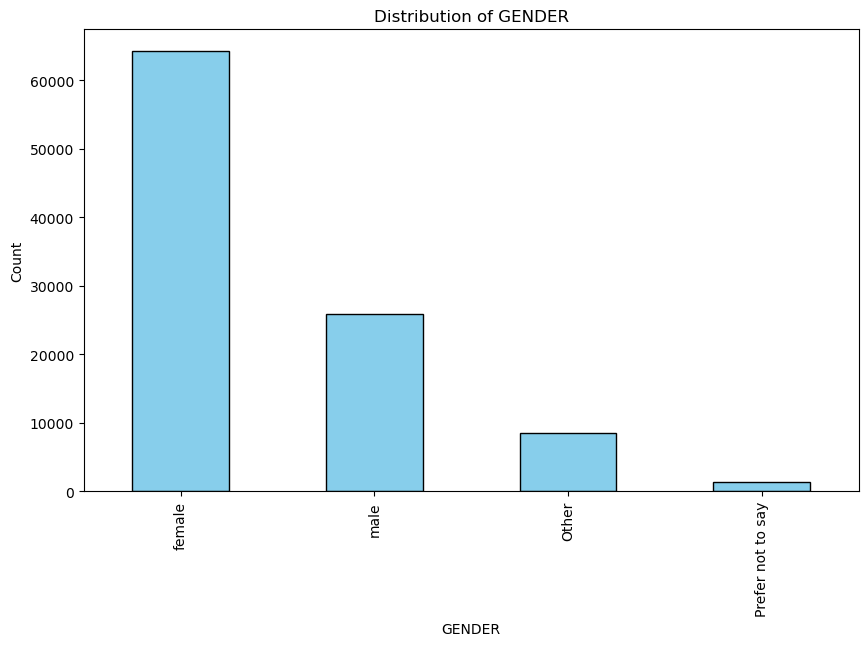

In [23]:
# Analysing gender column values
# Count occurrences of each state
Counts = df_Users['GENDER'].value_counts()

# Create bar chart
plt.figure(figsize=(10, 6))

Counts.plot(kind='bar',color= 'skyblue', edgecolor='black')
plt.title('Distribution of GENDER')
plt.xlabel('GENDER')
plt.ylabel('Count')
plt.show()

#### The plot confirms that the 'Gender' column was effectively cleaned in the previous step. 
#### Similar to the 'State' column, no significant anomalies were identified, except for the presence of some null values.

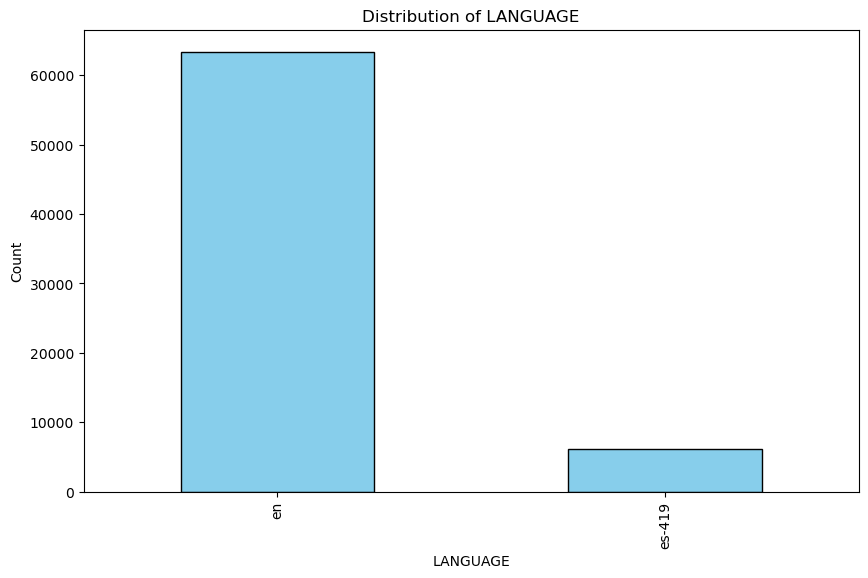

In [25]:
#Analysing language column
# Count occurrences of each state
Counts = df_Users['LANGUAGE'].value_counts()

# Create bar chart
plt.figure(figsize=(10, 6))
Counts.plot(kind='bar', color= 'skyblue', edgecolor='black')
plt.title('Distribution of LANGUAGE')
plt.xlabel('LANGUAGE')
plt.ylabel('Count')
plt.show()

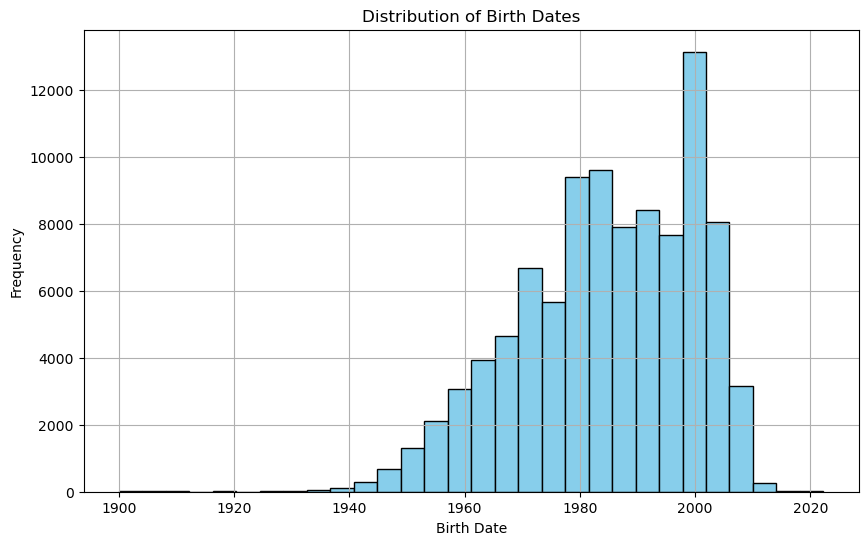

In [26]:
# Analyzing distribution of birth dates
# Plot a histogram of the birth dates
plt.figure(figsize=(10, 6))
plt.hist(df_Users['BIRTH_DATE'].dropna(), bins=30, edgecolor='k', color='skyblue')
plt.title('Distribution of Birth Dates')
plt.xlabel('Birth Date')
plt.ylabel('Frequency')
plt.grid(True)

plt.show()

#### We discovered that our dataset includes users born in the early 1900s, indicating a user base with individuals over 120 years old, an intriguing finding.

In [28]:
# Adding age column to the dataset based on user birth date.
from datetime import datetime
# Function to calculate age
def calculate_age(birth_date):
    if pd.isnull(birth_date):
        return 0  # if birth date has null value, age column will have zero as value 
    today = datetime.today()
    age = today.year - birth_date.year - ((today.month, today.day) < (birth_date.month, birth_date.day))
    return int(age)
    
# Apply the 'calculate_age' function to create the AGE column
df_Users['AGE'] = df_Users['BIRTH_DATE'].apply(calculate_age)
df_Users['AGE'] = df_Users['AGE'].replace( 0, None) 
# converting all zeros in age column back to Null/None values
#Display 5 rows in updated dataset
df_Users.head(5)

,ID,CREATED_DATE,BIRTH_DATE,STATE,LANGUAGE,GENDER,AGE
0,5ef3b4f17053ab141787697d,2020-06-24 20:17:54+00:00,2000-08-11 00:00:00+00:00,CA,es-419,female,24
1,5ff220d383fcfc12622b96bc,2021-01-03 19:53:55+00:00,2001-09-24 04:00:00+00:00,PA,en,female,23
2,6477950aa55bb77a0e27ee10,2023-05-31 18:42:18+00:00,1994-10-28 00:00:00+00:00,FL,es-419,female,30
3,658a306e99b40f103b63ccf8,2023-12-26 01:46:22+00:00,NaT,NC,en,Other,None
4,653cf5d6a225ea102b7ecdc2,2023-10-28 11:51:50+00:00,1972-03-19 00:00:00+00:00,PA,en,female,52


#### We have created 'Age' column based on users birth date.

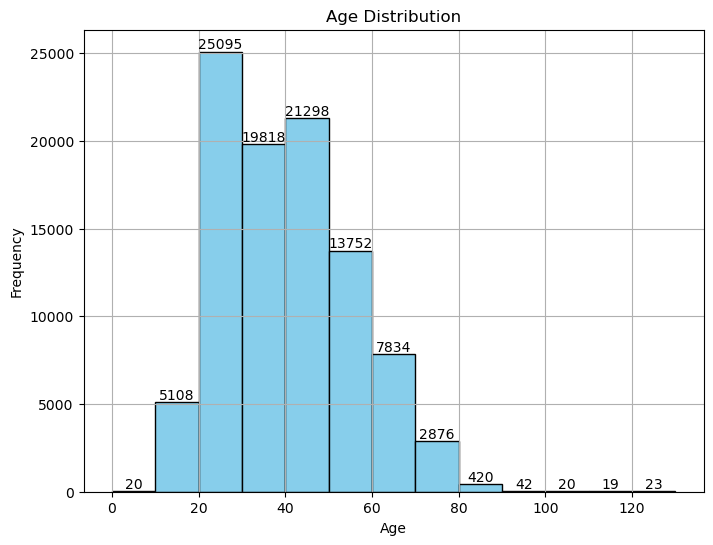

In [30]:
# Define custom bin ranges (for example, ages 0-10, 11-20, ..., 91-100)
bin_ranges = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100,110,120, 130]

# Plotting the histogram with custom bin ranges
plt.figure(figsize=(8, 6))
counts, bins, patches = plt.hist(df_Users['AGE'].dropna(), bins=bin_ranges, edgecolor='black', color='skyblue')

# Adding data labels on top of the bars
for count, x in zip(counts, bins):
    # Adjusting the position of the text label to be centered on the bar
    plt.text(x + (bins[1] - bins[0]) / 2, count, str(int(count)), ha='center', va='bottom')

plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

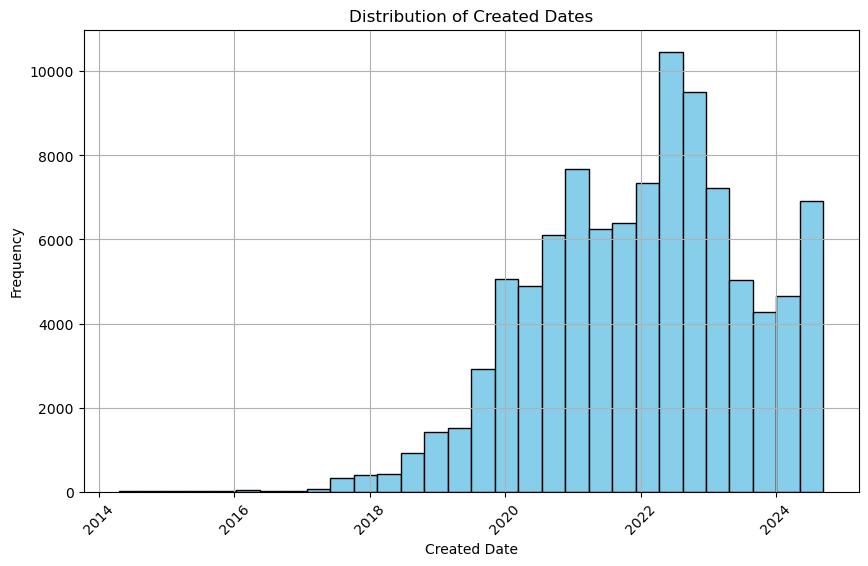

In [31]:
# Plot a histogram of the created dates
plt.figure(figsize=(10, 6))
plt.hist(df_Users['CREATED_DATE'].dropna(), bins=30, edgecolor='k', color='skyblue')
plt.title('Distribution of Created Dates')
plt.xlabel('Created Date')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

#### From the distribution of created dates, we noticed there is exponential increase in user's growth from the year 2017.

In [33]:
# Code to export the transformed users dataset to CSV for SQL table creation
csv_file_path = 'C:/Users/maggi/Downloads/TransformedUsers.csv' 
df_Users.to_csv(csv_file_path, index=False)

## Product Analysis

In [35]:
#loading the table into dataset
df_Products = pd.read_csv ('C:/Users/maggi/Downloads/PRODUCTS_TAKEHOME.csv')

In [36]:
#Analysing the dataset
# displays the first 5 rows in our dataset
df_Products.head()

,CATEGORY_1,CATEGORY_2,CATEGORY_3,CATEGORY_4,MANUFACTURER,BRAND,BARCODE
0,Health & Wellness,Sexual Health,Conductivity Gels & Lotions,NaN,NaN,NaN,7.964944e+11
1,Snacks,Puffed Snacks,Cheese Curls & Puffs,NaN,NaN,NaN,2.327801e+10
2,Health & Wellness,Hair Care,Hair Care Accessories,NaN,PLACEHOLDER MANUFACTURER,ELECSOP,4.618178e+11
3,Health & Wellness,Oral Care,Toothpaste,NaN,COLGATE-PALMOLIVE,COLGATE,3.500047e+10
4,Health & Wellness,Medicines & Treatments,Essential Oils,NaN,MAPLE HOLISTICS AND HONEYDEW PRODUCTS INTERCHA...,MAPLE HOLISTICS,8.068109e+11


#### From above, we observed the column names and their corresponding values to get a a basic understanding of the data. We observed that each product has four categories: one manufacturer, brand, and barcode. We also noted the presence of NaN values in our dataset.

In [38]:
# provides basic details 
df_Products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 845552 entries, 0 to 845551
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   CATEGORY_1    845441 non-null  object 
 1   CATEGORY_2    844128 non-null  object 
 2   CATEGORY_3    784986 non-null  object 
 3   CATEGORY_4    67459 non-null   object 
 4   MANUFACTURER  619078 non-null  object 
 5   BRAND         619080 non-null  object 
 6   BARCODE       841527 non-null  float64
dtypes: float64(1), object(6)
memory usage: 45.2+ MB


#### We determined the total number of records, and frequency of values within each column. All six columns have null values. As per the provided ER table 'BARCODE' will be thr unique identifier for this dataset. Let's analyse more to confirm cleaning steps.


In [40]:
# to get sum of null values in each column
df_Products.isnull().sum()

CATEGORY_1         111
CATEGORY_2        1424
CATEGORY_3       60566
CATEGORY_4      778093
MANUFACTURER    226474
BRAND           226472
BARCODE           4025
dtype: int64

In [41]:
# To check duplicates
df_Products.duplicated().sum()

215

#### From the above result, we have 215 duplicate records. Also, there are 4025 null values in BARCODE column.
#### As barcode will be the connecting key between products and transactions table. Having null values in the column will not help in data analysis as there will be no records to match in transactions.
#### In next step, will remove duplicates and null values in barcode column from the dataset.

In [43]:
# Dropping all rows where 'Barcode' is null. Since without barcode the product cannot be connected to other tables and used for analysis.
df_Products = df_Products.dropna(subset=['BARCODE'])
#dropping all duplicates from data
df_Products.drop_duplicates(inplace=True)
# Resetting the index
df_Products.reset_index(drop=True, inplace=True)

In [44]:
# assign data types
# Since our dataset contains NaN values, converting them to strings would result in 'nan' strings. To maintain null values, we'll replace 'nan' strings with None."
df_Products['CATEGORY_1'] = df_Products['CATEGORY_1'].astype(str).replace( 'nan', None)
df_Products['CATEGORY_2'] = df_Products['CATEGORY_2'].astype(str).replace( 'nan', None)
df_Products['CATEGORY_3'] = df_Products['CATEGORY_3'].astype(str).replace( 'nan', None)
df_Products['CATEGORY_4'] = df_Products['CATEGORY_4'].astype(str).replace( 'nan', None)
df_Products['MANUFACTURER'] = df_Products['MANUFACTURER'].astype(str).replace( 'nan', None)
df_Products['BRAND'] = df_Products['BRAND'].astype(str).replace( 'nan', None)
df_Products['BARCODE'] = df_Products['BARCODE'].astype('int64')

In [45]:
df_Products.duplicated().sum()

0

#### We have removed duplicates, null values from barcode and assigned proper datatypes to the columns. 

In [47]:
# checks the number of unique values in each column in the dataset
df_Products.nunique()

CATEGORY_1          27
CATEGORY_2         121
CATEGORY_3         341
CATEGORY_4         126
MANUFACTURER      4354
BRAND             8053
BARCODE         841342
dtype: int64

In [48]:
df_Products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 841369 entries, 0 to 841368
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   CATEGORY_1    841258 non-null  object
 1   CATEGORY_2    840708 non-null  object
 2   CATEGORY_3    782655 non-null  object
 3   CATEGORY_4    67234 non-null   object
 4   MANUFACTURER  615152 non-null  object
 5   BRAND         615154 non-null  object
 6   BARCODE       841369 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 44.9+ MB


#### The number of unique values for BARCODE column is 841342 where as total records is 841369. Lets analyse the barcodes which have multiple records

In [50]:
# Group by 'BARCODE' and count occurrences
BARCODE_fltdata = df_Products.groupby('BARCODE').size().reset_index(name='count')
BARCODE_MltRe = BARCODE_fltdata[BARCODE_fltdata['count'] == 2]
print( 'The number of Barcode with multiple records')
print( BARCODE_MltRe['BARCODE'].count())
print( 'The barcode with multiple records')
MultipleRec = df_Products[df_Products['BARCODE'].isin(BARCODE_MltRe['BARCODE'])].sort_values(by= 'BARCODE')
MultipleRec 

The number of Barcode with multiple records
27
The barcode with multiple records


,CATEGORY_1,CATEGORY_2,CATEGORY_3,CATEGORY_4,MANUFACTURER,BRAND,BARCODE
837069,Snacks,Candy,Chocolate Candy,None,MARS WRIGLEY,M&M'S,404310
138456,Snacks,Candy,Chocolate Candy,None,PLACEHOLDER MANUFACTURER,BRAND NOT KNOWN,404310
607741,Snacks,Nuts & Seeds,Snack Seeds,None,SUNRIDGE FARMS,SUNRIDGE FARMS,701983
642144,Snacks,Chips,Crisps,None,TRADER JOE'S,TRADER JOE'S,701983
677933,Snacks,Nuts & Seeds,Almonds,None,TRADER JOE'S,TRADER JOE'S,969307
170201,Snacks,Nuts & Seeds,Covered Nuts,None,TRADER JOE'S,TRADER JOE'S,969307
426214,Health & Wellness,Skin Care,Facial Lotion & Moisturizer,None,"R.M. PALMER COMPANY, LLC",PALMER,1018158
122606,Health & Wellness,Skin Care,Lip Balms & Treatments,Medicated Lip Treatments,"E.T. BROWNE DRUG CO., INC.",PALMER'S SKIN & HAIR CARE,1018158
35823,Snacks,Candy,Candy Variety Pack,None,THE HERSHEY COMPANY,HERSHEY'S,3422007
420796,Snacks,Candy,Chocolate Candy,None,THE HERSHEY COMPANY,HERSHEY'S,3422007


#### The above output shows some anomalies in the data. Let's resolve these inconsistencies case by case. 
#### First, identify barcodes with identical brand values. 

In [52]:
# Group by barcode and brand, and filter for groups with more than one record
duplicate_records = MultipleRec.groupby(['BARCODE', 'BRAND']).filter(lambda x: len(x) > 1)

# Print the duplicate records
duplicate_records

,CATEGORY_1,CATEGORY_2,CATEGORY_3,CATEGORY_4,MANUFACTURER,BRAND,BARCODE
677933,Snacks,Nuts & Seeds,Almonds,None,TRADER JOE'S,TRADER JOE'S,969307
170201,Snacks,Nuts & Seeds,Covered Nuts,None,TRADER JOE'S,TRADER JOE'S,969307
35823,Snacks,Candy,Candy Variety Pack,None,THE HERSHEY COMPANY,HERSHEY'S,3422007
420796,Snacks,Candy,Chocolate Candy,None,THE HERSHEY COMPANY,HERSHEY'S,3422007
400479,Snacks,Candy,Confection Candy,None,THE HERSHEY COMPANY,REESE'S,3431207
143983,Snacks,Candy,Chocolate Candy,None,THE HERSHEY COMPANY,REESE'S,3431207
192424,Snacks,Candy,Chocolate Candy,None,MARS WRIGLEY,M&M'S,4003207
136595,Snacks,Nuts & Seeds,Peanuts,None,MARS WRIGLEY,M&M'S,4003207
593905,Health & Wellness,First Aid,Ointments & Liquids,None,THE JM SMUCKER COMPANY,DICKINSON'S,5265169
764880,Health & Wellness,Skin Care,Skin Toners & Astringents,Astringents,THE JM SMUCKER COMPANY,DICKINSON'S,5265169


#### For identical barcodes and brands, records share the same column values except for category_3 and category_4. As our analysis doesn't delve into these deeper categories, we'll eliminate redundant records to ensure unique barcode-brand combinations.

In [54]:
unique_records = duplicate_records.drop_duplicates(subset='BARCODE', keep='first')

unique_records

,CATEGORY_1,CATEGORY_2,CATEGORY_3,CATEGORY_4,MANUFACTURER,BRAND,BARCODE
677933,Snacks,Nuts & Seeds,Almonds,None,TRADER JOE'S,TRADER JOE'S,969307
35823,Snacks,Candy,Candy Variety Pack,None,THE HERSHEY COMPANY,HERSHEY'S,3422007
400479,Snacks,Candy,Confection Candy,None,THE HERSHEY COMPANY,REESE'S,3431207
192424,Snacks,Candy,Chocolate Candy,None,MARS WRIGLEY,M&M'S,4003207
593905,Health & Wellness,First Aid,Ointments & Liquids,None,THE JM SMUCKER COMPANY,DICKINSON'S,5265169
56707,Snacks,Nuts & Seeds,Almonds,None,PLACEHOLDER MANUFACTURER,BRAND NOT KNOWN,20159078
259442,Snacks,Candy,Chocolate Candy,None,"LIDL US, LLC",LIDL,20522445
181036,Snacks,Candy,Confection Candy,None,GRUPO NACIONAL DE CHOCOLATES SA,NUTRESA,75053055
159,Health & Wellness,Hair Removal,Shaving Gel & Cream,Women's Shaving Gel & Cream,PLACEHOLDER MANUFACTURER,PRORASO,80199137
298924,Snacks,Candy,Confection Candy,None,PERFETTI VAN MELLE,MENTOS,87108538


#### The 'unique_records dataset is one part of our cleaned data. The next step is to clean the remaining records by making some assumptions. The assumption made for each barcode as commented on top of the code. Before further cleaning, remove the duplicate records from our actionable record list.

In [56]:
MultipleRec = MultipleRec[ ~ MultipleRec['BARCODE'].isin(duplicate_records['BARCODE'])]
MultipleRec

,CATEGORY_1,CATEGORY_2,CATEGORY_3,CATEGORY_4,MANUFACTURER,BRAND,BARCODE
837069,Snacks,Candy,Chocolate Candy,None,MARS WRIGLEY,M&M'S,404310
138456,Snacks,Candy,Chocolate Candy,None,PLACEHOLDER MANUFACTURER,BRAND NOT KNOWN,404310
607741,Snacks,Nuts & Seeds,Snack Seeds,None,SUNRIDGE FARMS,SUNRIDGE FARMS,701983
642144,Snacks,Chips,Crisps,None,TRADER JOE'S,TRADER JOE'S,701983
426214,Health & Wellness,Skin Care,Facial Lotion & Moisturizer,None,"R.M. PALMER COMPANY, LLC",PALMER,1018158
122606,Health & Wellness,Skin Care,Lip Balms & Treatments,Medicated Lip Treatments,"E.T. BROWNE DRUG CO., INC.",PALMER'S SKIN & HAIR CARE,1018158
466489,Snacks,Candy,Gum,None,GENERAL LICENSED IP MANUFACTURER,DISNEY,3454503
526159,Snacks,Candy,Gum,None,THE HERSHEY COMPANY,ICE BREAKERS,3454503
762465,Snacks,Candy,Chocolate Candy,None,THE HERSHEY COMPANY,REESE'S,3473009
537321,Snacks,Candy,Gum,None,THE HERSHEY COMPANY,BUBBLE YUM,3473009


In [57]:
# As there are already other records with values for same barcode, removing records where brand is null when there are 2 records for same barcode
MultipleRec = MultipleRec.dropna(subset = ['BRAND'])
# for barcodes 52336919068 and 17000329260, we have same 2 records so deleting one record in each barcode makes one barcode has one brand
MultipleRec = MultipleRec.query('not (BARCODE == 52336919068 and BRAND == "GÖT2B")')
MultipleRec = MultipleRec.query('not (BARCODE == 17000329260 and BRAND == "SCHWARZKOPF")')
# for barcode 80310167, assuming Brand = Kinder's is a duplicate for another record. removing it to make the barcode unique

MultipleRec = MultipleRec.query('not (BARCODE == 80310167 and BRAND == "KINDER\'S" )')
# for BARCODE = 40111216, since the category is snacks and assuming bounty is paper towel brand. removing it to make the barcode unique
MultipleRec = MultipleRec.query('not (BARCODE == 40111216 and BRAND == "BOUNTY")')   
# since we already have brand in one record so deleting "private label" records for barcode 20733056 to make it unique
MultipleRec = MultipleRec.query('not (BARCODE == 20733056 and BRAND == "PRIVATE LABEL")')  

# for barcodes 3484708 and 3454503, we have same 2 records so deleting one record in each barcode makes one barcode have one brand
MultipleRec = MultipleRec.query('not (BARCODE == 3484708 and BRAND == "DISNEY")')
MultipleRec = MultipleRec.query('not (BARCODE == 3454503 and BRAND == "ICE BREAKERS")')

# For barcode 404310, removing the record with brand named as 'BRAND NOT KNOWN'
MultipleRec = MultipleRec.query('not (BARCODE == 404310 and BRAND == "BRAND NOT KNOWN")') 
# Making the assumption that 'TRADER JOE'S' more related to snacks than 'SUNRIDGE FARMS' for barcode 701983
MultipleRec = MultipleRec.query('not (BARCODE == 701983 and BRAND == "SUNRIDGE FARMS")') 
# Since both records for Barcode 1018158 related to PALMER, deleting 'PALMER'S SKIN & HAIR CARE' record for uniqueness
MultipleRec = MultipleRec.query('not (BARCODE == 1018158 and BRAND == "PALMER\'S SKIN & HAIR CARE")')
# For barcode 3473009, assuming REESE's more famous than Bubble YUM. assigning the barcode to REESE's by deleting BUBBLE YUM entry.
MultipleRec = MultipleRec.query('not (BARCODE == 3473009 and BRAND == "BUBBLE YUM")')
MultipleRec

,CATEGORY_1,CATEGORY_2,CATEGORY_3,CATEGORY_4,MANUFACTURER,BRAND,BARCODE
837069,Snacks,Candy,Chocolate Candy,None,MARS WRIGLEY,M&M'S,404310
642144,Snacks,Chips,Crisps,None,TRADER JOE'S,TRADER JOE'S,701983
426214,Health & Wellness,Skin Care,Facial Lotion & Moisturizer,None,"R.M. PALMER COMPANY, LLC",PALMER,1018158
466489,Snacks,Candy,Gum,None,GENERAL LICENSED IP MANUFACTURER,DISNEY,3454503
762465,Snacks,Candy,Chocolate Candy,None,THE HERSHEY COMPANY,REESE'S,3473009
591823,Snacks,Candy,Gum,None,THE HERSHEY COMPANY,ICE BREAKERS,3484708
779145,Snacks,Cookies,None,None,PLACEHOLDER MANUFACTURER,PRIVATE LABEL,20031077
205197,Snacks,Crackers,Graham Crackers,None,"LIDL US, LLC",LIDL,20733056
778164,Snacks,Chips,Crisps,None,PLACEHOLDER MANUFACTURER,PRIVATE LABEL,20733254
452378,Snacks,Candy,Chocolate Candy,None,MARS WRIGLEY,MARS,40111216


In [58]:
#### The above code aimed to clean and refine the dataset by removing redundant and irrelevant records. 
#### It began by removing records with missing brand information. Then, it addressed duplicate records by selecting the most relevant brand based on factors such as product category and manufacturer reputation. For instance, it removed less relevant brands for specific barcodes and prioritized certain brands over others. 
#### By performing these data cleaning steps, the resulting dataset was intended to be more accurate, reliable, and suitable for further analysis.
#### From the cleaning part, we got our unique records for each barcode, now need to remove all multiple records from main dataset and add our unique records.

In [59]:
# Filtering for barcode with multiple records
Barcode2records = df_Products[df_Products['BARCODE'].isin(BARCODE_MltRe['BARCODE'])].sort_values(by= 'BARCODE')
# Removing the barcodes with multiple records from the dataset
df_Products = df_Products[ ~ df_Products['BARCODE'].isin(Barcode2records['BARCODE'])]

In [60]:
# Adding the unique barcode records obtained after cleaning to the main dataset
df_Products = pd.concat([df_Products, MultipleRec, unique_records], ignore_index=True)

In [61]:
df_Products = pd.concat([df_Products, MultipleRec, unique_records], ignore_index=True)
#Reconfirming the values in dataset
df_Products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 841369 entries, 0 to 841368
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   CATEGORY_1    841258 non-null  object
 1   CATEGORY_2    840708 non-null  object
 2   CATEGORY_3    782655 non-null  object
 3   CATEGORY_4    67232 non-null   object
 4   MANUFACTURER  615157 non-null  object
 5   BRAND         615159 non-null  object
 6   BARCODE       841369 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 44.9+ MB


#### After these transformations, we obtained a dataset with a unique BARCODE column, suitable for use as a primary key to avoid data inconsistencies. Before finalizing, let's analyze the missing category_1 values to identify uncovered product types.

In [63]:
df_Products['CATEGORY_1'].unique()

array(['Health & Wellness', 'Snacks', 'Beverages', 'Pantry', 'Alcohol',
       'Apparel & Accessories', 'Restaurant', 'Needs Review', 'Dairy',
       'Home & Garden', None, 'Household Supplies', 'Meat & Seafood',
       'Deli & Bakery', 'Sporting Goods', 'Produce', 'Office & School',
       'Frozen', 'Arts & Entertainment', 'Animals & Pet Supplies',
       'Electronics', 'Beauty', 'Toys & Games', 'Mature',
       'Vehicles & Parts', 'Baby & Toddler', 'Luggage & Bags', 'Media'],
      dtype=object)

In [64]:
Cat1_Null = df_Products[df_Products['CATEGORY_1'].isnull()]
Cat1_Null

,CATEGORY_1,CATEGORY_2,CATEGORY_3,CATEGORY_4,MANUFACTURER,BRAND,BARCODE
5155,None,None,None,None,KEURIG DR PEPPER,POLAR,715371108216
14972,None,None,None,None,THE COCA-COLA COMPANY,COCA-COLA,196365503574
25178,None,None,None,None,MOLSONCOORS,COORS LIGHT,198181051598
35412,None,None,None,None,THE COCA-COLA COMPANY,COCA-COLA,196983108397
42981,None,None,None,None,KEURIG DR PEPPER,POLAR,644376098768
...,...,...,...,...,...,...,...
811007,None,None,None,None,MOLSONCOORS,COORS LIGHT,198181051574
823907,None,None,None,None,PEPSICO,CHEETOS,28400720984
834689,None,None,None,None,THE COCA-COLA COMPANY,COCA-COLA,196983108489
836950,None,None,None,None,MOLSONCOORS,COORS LIGHT,198181051772


#### The results indicate that most records, not just category_1, lack category information. We'll leverage brand and manufacturer data to assign appropriate category_1 values based on existing patterns.

In [66]:
print(Cat1_Null.nunique())
print(Cat1_Null['MANUFACTURER'].unique())
print(Cat1_Null['BRAND'].unique())


CATEGORY_1        0
CATEGORY_2        0
CATEGORY_3        0
CATEGORY_4        0
MANUFACTURER      8
BRAND            11
BARCODE         111
dtype: int64
['KEURIG DR PEPPER' 'THE COCA-COLA COMPANY' 'MOLSONCOORS' 'GENERAL MILLS'
 'MARS WRIGLEY' 'PEPSICO' 'SARGENTO' 'GALLO']
['POLAR' 'COCA-COLA' 'COORS LIGHT' 'CHEERIOS' 'SNICKERS' 'CHEETOS'
 'FRITO-LAY' 'BUBLY SPARKLING WATER' 'PEPSI' 'SARGENTO' 'BAREFOOT']


In [67]:
# Define the mapping of manufacturers to cat1 values
cat1_mapping = {
    'THE COCA-COLA COMPANY': 'Beverages',
    'PEPSICO': 'Beverages',
    'MOLSONCOORS': 'Alcohol',
    'KEURIG DR PEPPER': 'Snacks',
    'GENERAL MILLS': 'Pantry',
    'MARS WRIGLEY': 'Snacks',
    'SARGENTO': 'Pantry',
    'GALLO': 'Alcohol'  
}

# Use map to assign CATEGORY_1 values based on the manufacturer details
Cat1_Null['CATEGORY_1'] = Cat1_Null['MANUFACTURER'].map(cat1_mapping)


#### Based on the MANUFACTURER details, added appropriate CATEGORY_1 values. Since the category_1 column is complete, we can perform analysis like sales cross different category_1 values.

In [69]:
# Code to export the transformed product dataset to CSV for SQL table creation
csv_file_path = 'C:/Users/maggi/Downloads/TransformedProducts.csv' 
df_Products.to_csv(csv_file_path, index=False)

## Transactions Analysis

In [71]:
#loading the table into dataset
df_Transactions = pd.read_csv ('C:/Users/maggi/Downloads/TRANSACTION_TAKEHOME.csv')


In [72]:
#Analysing the dataset
# displays the first 5 rows in our dataset
df_Transactions.head()

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
0,0000d256-4041-4a3e-adc4-5623fb6e0c99,2024-08-21,2024-08-21 14:19:06.539 Z,WALMART,63b73a7f3d310dceeabd4758,1.530001e+10,1.00,
1,0001455d-7a92-4a7b-a1d2-c747af1c8fd3,2024-07-20,2024-07-20 09:50:24.206 Z,ALDI,62c08877baa38d1a1f6c211a,NaN,zero,1.49
2,00017e0a-7851-42fb-bfab-0baa96e23586,2024-08-18,2024-08-19 15:38:56.813 Z,WALMART,60842f207ac8b7729e472020,7.874223e+10,1.00,
3,000239aa-3478-453d-801e-66a82e39c8af,2024-06-18,2024-06-19 11:03:37.468 Z,FOOD LION,63fcd7cea4f8442c3386b589,7.833997e+11,zero,3.49
4,00026b4c-dfe8-49dd-b026-4c2f0fd5c6a1,2024-07-04,2024-07-05 15:56:43.549 Z,RANDALLS,6193231ae9b3d75037b0f928,4.790050e+10,1.00,


#### From the initial data exploration, we observed eight columns and identified the presence of missing values (NaN). Notably, the 'Final_Quantity' column contains both numeric and string values, such as 'Zero'.

In [74]:
# provides basic details 
df_Transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RECEIPT_ID      50000 non-null  object 
 1   PURCHASE_DATE   50000 non-null  object 
 2   SCAN_DATE       50000 non-null  object 
 3   STORE_NAME      50000 non-null  object 
 4   USER_ID         50000 non-null  object 
 5   BARCODE         44238 non-null  float64
 6   FINAL_QUANTITY  50000 non-null  object 
 7   FINAL_SALE      50000 non-null  object 
dtypes: float64(1), object(7)
memory usage: 3.1+ MB


#### As our initial glancce revealed potential data quality issues, including null values and inconsistent data types. However, a more detailed analysis showed that only one column, likely 'Final_Quantity', contains null values. This necessitates data cleaning and appropriate data type assignment for accurate analysis.

In [76]:
# To check duplicates
df_Transactions.duplicated().sum()

171

In [77]:
# Dropping duplicates from data
df_Transactions.drop_duplicates(inplace = True)
# Resetting the index
df_Transactions.reset_index(drop=True, inplace=True)

#### Transactions lacking both product (BARCODE) and user (USER_ID) information are considered incomplete and will be removed from the dataset as they do not provide any value.

In [79]:
df_Transactions.dropna(subset = ['BARCODE'],inplace = True)
# Resetting the index
df_Transactions.reset_index(drop=True, inplace=True)

#### We already noticed the data quality issue in 'FINAL_QUANTITY' column, lets verify and transform the column before assigning data types.

In [81]:
df_Transactions['FINAL_QUANTITY'].unique()

array(['1.00', 'zero', '2.00', '3.00', '4.00', '4.55', '7.00', '18.00',
       '5.00', '2.17', '0.23', '8.00', '0.09', '2.58', '1.47', '16.00',
       '0.62', '12.00', '1.40', '0.51', '1.69', '6.00', '2.39', '10.00',
       '0.86', '1.54', '1.88', '2.93', '2.89', '1.44', '2.75', '276.00',
       '0.87', '2.10', '3.33', '1.34', '1.13', '0.83', '0.28', '1.50',
       '0.97', '1.18', '6.22', '1.28', '2.57', '1.07', '2.11', '0.48',
       '3.11', '1.08', '5.53', '1.89', '0.01', '2.18', '2.25', '1.37',
       '0.46', '9.00', '0.35', '0.99', '1.80', '3.24', '0.94', '2.04',
       '3.69', '2.52', '2.27'], dtype=object)

#### In the values list, I see only one inconsistency i.e, 'ZERO'. Lets resolve this.

In [83]:
df_Transactions['FINAL_QUANTITY']= df_Transactions['FINAL_QUANTITY'].replace('zero', '0.00')


In [84]:
# Assign data types
df_Transactions['RECEIPT_ID'] = df_Transactions['RECEIPT_ID'].astype(str).replace( 'nan', None)
df_Transactions['PURCHASE_DATE'] = pd.to_datetime(df_Transactions['PURCHASE_DATE'])
df_Transactions['SCAN_DATE'] = pd.to_datetime(df_Transactions['SCAN_DATE'])
df_Transactions['STORE_NAME'] = df_Transactions['STORE_NAME'].astype('category').replace( 'nan', None)
df_Transactions['USER_ID'] = df_Transactions['USER_ID'].astype(str).replace( 'nan', None)
df_Transactions['BARCODE'] = df_Transactions['BARCODE'].astype('int64')
# Convert to numeric (to keep decimal points) without filling NaN
df_Transactions['FINAL_QUANTITY'] = pd.to_numeric(df_Transactions['FINAL_QUANTITY'], errors='coerce').round(2)
df_Transactions['FINAL_SALE'] = pd.to_numeric(df_Transactions['FINAL_SALE'], errors='coerce').round(2)





In [85]:
df_Transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44094 entries, 0 to 44093
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   RECEIPT_ID      44094 non-null  object             
 1   PURCHASE_DATE   44094 non-null  datetime64[ns]     
 2   SCAN_DATE       44094 non-null  datetime64[ns, UTC]
 3   STORE_NAME      44094 non-null  category           
 4   USER_ID         44094 non-null  object             
 5   BARCODE         44094 non-null  int64              
 6   FINAL_QUANTITY  44094 non-null  float64            
 7   FINAL_SALE      33063 non-null  float64            
dtypes: category(1), datetime64[ns, UTC](1), datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 2.5+ MB


In [86]:
# to get sum of null values in each column
df_Transactions.isnull().sum()

RECEIPT_ID            0
PURCHASE_DATE         0
SCAN_DATE             0
STORE_NAME            0
USER_ID               0
BARCODE               0
FINAL_QUANTITY        0
FINAL_SALE        11031
dtype: int64

#### Assuming any transaction without a sale is dummy value. Removing all null values of FINAL_SALE column from data.

In [88]:
df_Transactions.dropna(subset = ['FINAL_SALE'],inplace = True)

#### With the data cleaned and duplicates removed, we will now identify a suitable primary key. This key will uniquely identify each record and enable efficient data manipulation and analysis. We will examine the combination of columns, such as BARCODE, USER_ID, RECEIPT_ID etc to determine the most appropriate primary key.

In [90]:
# Finding the count of barcode for each receipt id
CountReceipt = df_Transactions.groupby('RECEIPT_ID')['BARCODE'].count()
CountReceipt.unique()

array([1, 2, 3, 4, 5], dtype=int64)

In [91]:
# Examine the records where the count of barcodes for single receipt id is 5
CountReceiptGreaterThan1 = CountReceipt[CountReceipt > 4]
CountReceiptGreaterThan1

RECEIPT_ID
171a74cd-7038-43fa-a3ae-de6b6cca5d36    5
2acd7e8d-37df-4e51-8ee5-9a9c8c1d9711    5
4495fbcf-ad2c-4e4f-a77b-ff2ba6984f54    5
682cb059-74a1-4c47-abd8-5fd6541d88bf    5
6e5ec1d0-e63f-4707-bd6e-78672ecd2a6c    5
d6a313ee-1aa3-4acb-a90d-f0d962ae7b8c    5
d6b3acb1-2c78-41f0-86be-9b65dae6c6b7    5
dd03ea1b-0fae-4bcf-bb55-d7e36eaa75b5    5
Name: BARCODE, dtype: int64

In [92]:
# checking one receipt id from the above results
df_Transactions[df_Transactions['RECEIPT_ID'] == '171a74cd-7038-43fa-a3ae-de6b6cca5d36'].sort_values(by='BARCODE')

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
2014,171a74cd-7038-43fa-a3ae-de6b6cca5d36,2024-08-23,2024-08-26 13:05:26.018000+00:00,MEIJER,626c4d73283e195930fbd0e0,36200431689,0.0,5.19
36137,171a74cd-7038-43fa-a3ae-de6b6cca5d36,2024-08-23,2024-08-26 13:05:26.018000+00:00,MEIJER,626c4d73283e195930fbd0e0,36200431689,1.0,5.19
28979,171a74cd-7038-43fa-a3ae-de6b6cca5d36,2024-08-23,2024-08-26 13:05:26.018000+00:00,MEIJER,626c4d73283e195930fbd0e0,80000005281,2.0,1.98
2016,171a74cd-7038-43fa-a3ae-de6b6cca5d36,2024-08-23,2024-08-26 13:05:26.018000+00:00,MEIJER,626c4d73283e195930fbd0e0,705599016417,0.0,5.39
24603,171a74cd-7038-43fa-a3ae-de6b6cca5d36,2024-08-23,2024-08-26 13:05:26.018000+00:00,MEIJER,626c4d73283e195930fbd0e0,705599016417,1.0,5.39


In [93]:
# checking one more receipt id 
df_Transactions[df_Transactions['RECEIPT_ID'] == '682cb059-74a1-4c47-abd8-5fd6541d88bf'].sort_values(by='BARCODE')

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
8990,682cb059-74a1-4c47-abd8-5fd6541d88bf,2024-09-07,2024-09-07 15:47:48.122000+00:00,WALMART,61ac11e6e9b3d75037b5808a,12000000089,0.0,11.70
30637,682cb059-74a1-4c47-abd8-5fd6541d88bf,2024-09-07,2024-09-07 15:47:48.122000+00:00,WALMART,61ac11e6e9b3d75037b5808a,12000000089,1.0,11.70
8992,682cb059-74a1-4c47-abd8-5fd6541d88bf,2024-09-07,2024-09-07 15:47:48.122000+00:00,WALMART,61ac11e6e9b3d75037b5808a,28400589864,0.0,1.36
41406,682cb059-74a1-4c47-abd8-5fd6541d88bf,2024-09-07,2024-09-07 15:47:48.122000+00:00,WALMART,61ac11e6e9b3d75037b5808a,28400589864,1.0,1.36
41407,682cb059-74a1-4c47-abd8-5fd6541d88bf,2024-09-07,2024-09-07 15:47:48.122000+00:00,WALMART,61ac11e6e9b3d75037b5808a,28400589864,1.0,4.48


#### From the both results, we observed a pattern assumming the records with FINAL_QUANTITY as 0 are dummy transactions

In [95]:
# Removing the records where final quantity is 0 from the data
df_Transactions = df_Transactions[ ~ (df_Transactions['FINAL_QUANTITY'] == 0.0)]

In [96]:
# confirming our cleaning step results with above receipt id 
df_Transactions[df_Transactions['RECEIPT_ID'] == '682cb059-74a1-4c47-abd8-5fd6541d88bf'].sort_values(by='BARCODE')

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
30637,682cb059-74a1-4c47-abd8-5fd6541d88bf,2024-09-07,2024-09-07 15:47:48.122000+00:00,WALMART,61ac11e6e9b3d75037b5808a,12000000089,1.0,11.70
41406,682cb059-74a1-4c47-abd8-5fd6541d88bf,2024-09-07,2024-09-07 15:47:48.122000+00:00,WALMART,61ac11e6e9b3d75037b5808a,28400589864,1.0,1.36
41407,682cb059-74a1-4c47-abd8-5fd6541d88bf,2024-09-07,2024-09-07 15:47:48.122000+00:00,WALMART,61ac11e6e9b3d75037b5808a,28400589864,1.0,4.48


#### From the above results revealed an inconsistency in the data. For identical combinations of barcode, receipt ID, user ID, store, purchase date, and final quantity, there are instances of varying final sale values. This discrepancy raises concerns regarding the overall data quality and reliability of the dataset. To further investigate this issue, we will examine specific examples and analyze the frequency of such inconsistencies.

In [98]:
#Recounting the barcodes for each receipt id
reCountReceipt = df_Transactions.groupby('RECEIPT_ID')['BARCODE'].count()
reCountReceipt.unique()

array([1, 2, 3], dtype=int64)

In [99]:
# Again examine the records where the count of barcodes for single receipt id is 3 
recntreceipt = reCountReceipt[reCountReceipt == 2]
recntreceipt

RECEIPT_ID
019520fd-f28b-42ff-a29e-d6bf4f5c4b7c    2
01d0e64c-0b62-405f-a7bf-2dc04c36a53d    2
0373c1d8-3cc9-4cb2-a4f9-ddc7a974b671    2
0386ab8c-8a01-4479-8ee7-eb82a72a4895    2
048cbab3-cc04-4feb-b465-4ecf83d4d11e    2
                                       ..
fe13667f-213e-4ae3-a407-62742de62718    2
fe470ce1-4712-4d43-a576-f055e6504ec0    2
fe5736bd-9e29-465a-bd65-5613c78c3e2a    2
fe940799-e626-46b5-9f40-ffeb2fa1fc8f    2
ffd083e2-40c5-41f7-a554-832b767d9b2e    2
Name: BARCODE, Length: 329, dtype: int64

In [100]:
# checking one receipt id from the above
df_Transactions[df_Transactions['RECEIPT_ID'] == '0fb89572-c817-47e2-bd11-6f467baacbb2'].sort_values(by='BARCODE')

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
35964,0fb89572-c817-47e2-bd11-6f467baacbb2,2024-06-24,2024-06-25 17:51:10.487000+00:00,WALMART,6279df2c0310ba3330cdbd56,36200002179,1.0,4.78
40396,0fb89572-c817-47e2-bd11-6f467baacbb2,2024-06-24,2024-06-25 17:51:10.487000+00:00,WALMART,6279df2c0310ba3330cdbd56,41789001666,1.0,0.50
32427,0fb89572-c817-47e2-bd11-6f467baacbb2,2024-06-24,2024-06-25 17:51:10.487000+00:00,WALMART,6279df2c0310ba3330cdbd56,78742012285,1.0,1.42


In [101]:
df_Transactions[df_Transactions['RECEIPT_ID'] == '61dc6179-7ae7-4acd-b043-8ba796bc5949'].sort_values(by='BARCODE')


,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
42795,61dc6179-7ae7-4acd-b043-8ba796bc5949,2024-09-08,2024-09-08 13:30:53.944000+00:00,WALMART,63379ef227ef842ac62b6e42,49000057966,1.0,0.94
42796,61dc6179-7ae7-4acd-b043-8ba796bc5949,2024-09-08,2024-09-08 13:30:53.944000+00:00,WALMART,63379ef227ef842ac62b6e42,49000057966,3.0,0.94


#### For identical combinations of barcode, receipt ID, user ID, store, purchase date, and scan date, where only the final quantity or final sale value differs, we will consolidate these records into a single record. This consolidation will involve summing the final quantity and final sale values across the multiple records.

In [103]:
df_Transactions.columns

Index(['RECEIPT_ID', 'PURCHASE_DATE', 'SCAN_DATE', 'STORE_NAME', 'USER_ID',
       'BARCODE', 'FINAL_QUANTITY', 'FINAL_SALE'],
      dtype='object')

In [104]:
# Selecting columns to form unique key
groupcolumns = ['RECEIPT_ID', 'USER_ID', 'BARCODE']

# Perform the groupby and sum on FINAL_QUANTITY and FINAL_SALE
summed_df = df_Transactions.groupby(groupcolumns, as_index=False).agg({
    'FINAL_QUANTITY': 'sum',
    'FINAL_SALE': 'sum'
})

summed_df

,RECEIPT_ID,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
0,0000d256-4041-4a3e-adc4-5623fb6e0c99,63b73a7f3d310dceeabd4758,15300014978,1.0,1.54
1,00017e0a-7851-42fb-bfab-0baa96e23586,60842f207ac8b7729e472020,78742229751,1.0,2.54
2,000239aa-3478-453d-801e-66a82e39c8af,63fcd7cea4f8442c3386b589,783399746536,1.0,3.49
3,00026b4c-dfe8-49dd-b026-4c2f0fd5c6a1,6193231ae9b3d75037b0f928,47900501183,1.0,5.29
4,0002d8cd-1701-4cdd-a524-b70402e2dbc0,5dcc6c510040a012b8e76924,681131411295,1.0,1.46
...,...,...,...,...,...
21974,fff60bb7-bf93-4e6b-8055-4d7688da7ead,5eb887f71699c213b1abe2e1,78742213224,1.0,1.23
21975,fff6c6c8-e002-4262-85ea-25849d9721db,6220b111e9e82c0c6bc24534,78742369822,1.0,1.97
21976,fffbb112-3cc5-47c2-b014-08db2f87e0c7,5eb59d6be7012d13941af5e2,818000020115,1.0,4.88
21977,fffbfb2a-7c1f-41c9-a5da-628fa7fcc746,62a0c8f7d966665570351bb8,13000009546,1.0,3.48


#### Since the combination of RECEIPT_ID, USER_ID, and BARCODE uniquely identifies each transaction, we'll use this combination to group and consolidate the FINAL_QUANTITY and FINAL_SALE values. This approach aligns with our assumption of improving data quality by combining records with identical characteristics except for final quantity and final sale.

In [106]:
# Specify the columns to merge on
merge_columns = ['RECEIPT_ID', 'USER_ID', 'BARCODE']

# Merge summed_df with df_Transactions on the specified columns
# Use a left join to keep all records in summed_df and add columns from df_Transactions
df_Transactions = pd.merge(
    summed_df,
    df_Transactions.drop(columns=['FINAL_QUANTITY', 'FINAL_SALE']),  # Exclude columns that already exist in summed_df
    on=merge_columns,
    how='left'
)

# Check the result
df_Transactions.head()

,RECEIPT_ID,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE,PURCHASE_DATE,SCAN_DATE,STORE_NAME
0,0000d256-4041-4a3e-adc4-5623fb6e0c99,63b73a7f3d310dceeabd4758,15300014978,1.0,1.54,2024-08-21,2024-08-21 14:19:06.539000+00:00,WALMART
1,00017e0a-7851-42fb-bfab-0baa96e23586,60842f207ac8b7729e472020,78742229751,1.0,2.54,2024-08-18,2024-08-19 15:38:56.813000+00:00,WALMART
2,000239aa-3478-453d-801e-66a82e39c8af,63fcd7cea4f8442c3386b589,783399746536,1.0,3.49,2024-06-18,2024-06-19 11:03:37.468000+00:00,FOOD LION
3,00026b4c-dfe8-49dd-b026-4c2f0fd5c6a1,6193231ae9b3d75037b0f928,47900501183,1.0,5.29,2024-07-04,2024-07-05 15:56:43.549000+00:00,RANDALLS
4,0002d8cd-1701-4cdd-a524-b70402e2dbc0,5dcc6c510040a012b8e76924,681131411295,1.0,1.46,2024-06-24,2024-06-24 19:44:54.247000+00:00,WALMART


#### Merging the consolidated data with the original transaction data. 

In [108]:
# Code to export the transformed transactions dataset to CSV for SQL table creation
csv_file_path = 'C:/Users/maggi/Downloads/TransformedTransactions.csv' 
df_Transactions.to_csv(csv_file_path, index=False)

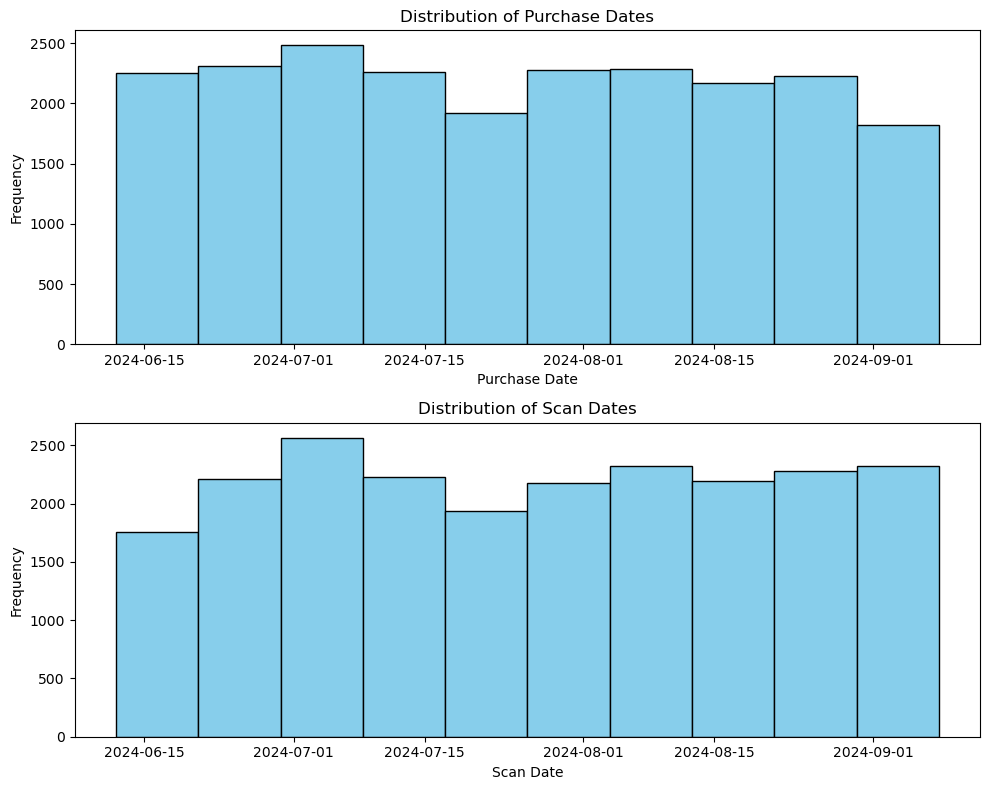

In [109]:
# Plotting dates in transactions to understand their frequency
fig, axs = plt.subplots(2, 1, figsize=(10, 8))

# Plot Purchase Date distribution
axs[0].hist(df_Transactions['PURCHASE_DATE'].dt.date, bins=10, color='skyblue', edgecolor='black')
axs[0].set_title("Distribution of Purchase Dates")
axs[0].set_xlabel("Purchase Date")
axs[0].set_ylabel("Frequency")

# Plot Scan Date distribution
axs[1].hist(df_Transactions['SCAN_DATE'].dt.date, bins=10, color='skyblue', edgecolor='black')
axs[1].set_title("Distribution of Scan Dates")
axs[1].set_xlabel("Scan Date")
axs[1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()